In [4]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
import time
import datetime

from spacepy import coordinates as coord
from spacepy.time import Ticktock

# import xflib
# # Coordinate transformation library
# xf = xflib.xflib(lib_path='/shared/users/asousa/WIPP/3dWIPP/python/libxformd.so')



# from raytracer_utils import readdump, read_rayfile, read_rayfiles
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib nbagg
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2
# --------------- Latex Plot Beautification --------------------------
fig_width = 12
fig_height = 4
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

<IPython.core.display.Javascript object>


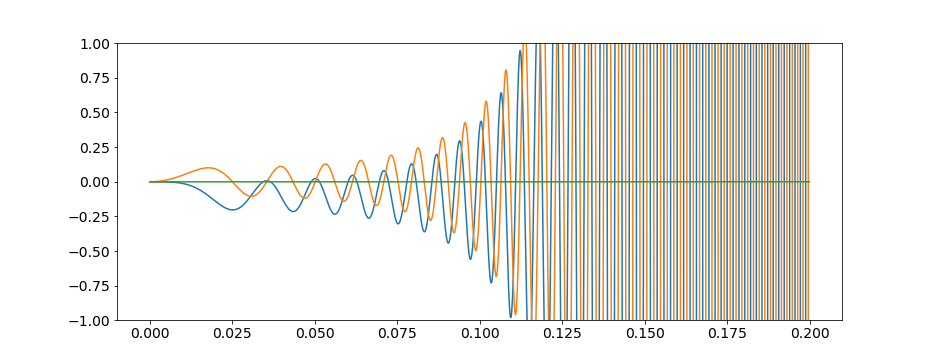

(-1, 1)

In [56]:
B0 = np.array([0,0,1])

theta = 0
vpar = 0.1
vperp = 0.1


x = np.array([0,0,0])
v = np.array([vperp*np.sin(theta), vperp*np.cos(theta), vpar])

traj = []


tvec = np.arange(0,.2,1e-4)

for t in tvec:
    x = x + v*t
    traj.append(x)    
    dv = np.cross(B0, v)
    v += dv*t
    v[-1] = 0
#     print x
traj = np.array(traj)
plt.figure()
plt.plot(tvec,traj)
plt.ylim([-1,1])

In [59]:
# imports
import numpy as np
from scipy.integrate import ode
# Copypasted from: http://flothesof.github.io/charged-particle-trajectories-E-and-B-fields.html
def newton(t, Y, q, m, B):
    """Computes the derivative of the state vector y according to the equation of motion:
    Y is the state vector (x, y, z, u, v, w) === (position, velocity).
    returns dY/dt.
    """
    x, y, z = Y[0], Y[1], Y[2]
    u, v, w = Y[3], Y[4], Y[5]
    
    alpha = q / m * B
    return np.array([u, v, w, 0, alpha * w, -alpha * v])

r = ode(newton).set_integrator('dopri5')
t0 = 0
x0 = np.array([0, 0, 0])
v0 = np.array([1, 1, 0])
initial_conditions = np.concatenate((x0, v0))

r.set_initial_value(initial_conditions, t0).set_f_params(-1.0, 1.0, 1.0)

positions = []
t1 = 50
dt = 0.05
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    positions.append(r.y[:3]) # keeping only position, not velocity

positions = np.array(positions)

<IPython.core.display.Javascript object>


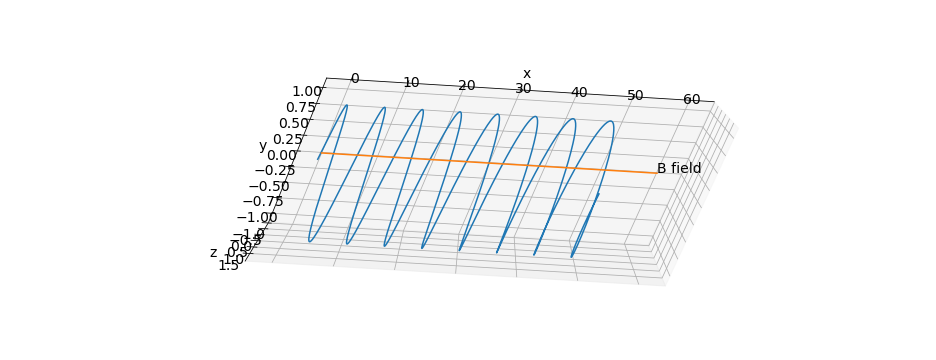

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(positions[:, 0], positions[:, 1], positions[:, 2])

B1 = np.array([x0[0], x0[1], -1])
B2 = np.array([60, 0, 0])
B_axis = np.vstack((B1, B1 + B2))
ax.plot3D(B_axis[:, 0], 
         B_axis[:, 1],
         B_axis[:, 2])
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
ax.text3D((B1 + B2)[0], (B1 + B2)[1], (B1 + B2)[2], "B field")
# ax.set_aspect('equal')

<IPython.core.display.Javascript object>


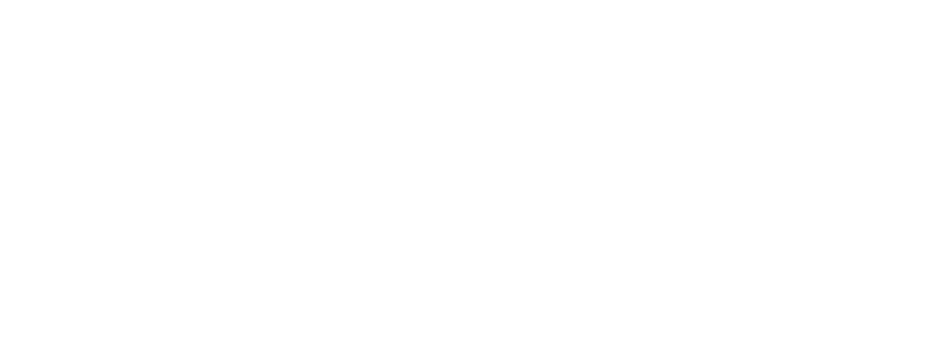

Animation.save using <class 'matplotlib.animation.ImageMagickFileWriter'>
MovieWriter.run: running command: convert -delay 5.0 -loop 0 _tmp*.png /tmp/tmpBb2dxo.mp4


RuntimeError: Error creating movie, return code: 1 Try setting mpl.verbose.set_level("helpful")

In [68]:
from IPython.display import HTML
from tempfile import NamedTemporaryFile
import base64 
from matplotlib import animation
VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""
import matplotlib
matplotlib.verbose.set_level("helpful")
def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        f = NamedTemporaryFile(suffix='.mp4', delete=False)
        anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
        f.flush()
        video = open(f.name, "rb").read()
        f.close()
        anim._encoded_video = base64.b64encode(video).decode('utf-8')
    
    return VIDEO_TAG.format(anim._encoded_video)

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

FRAMES = 50
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
# animation function.  This is called sequentially
def animate(i):
    current_index = int(positions.shape[0] / FRAMES * i)
    ax.cla()
    ax.plot3D(positions[:current_index, 0], 
              positions[:current_index, 1], 
              positions[:current_index, 2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
# call the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=FRAMES, interval=100)

# call our new function to display the animation
display_animation(anim)